In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt 
import cv2 as cv

In [3]:
import shutil

# Copy the directory to a writable location
shutil.copytree("/kaggle/input/yolonew/news", "/kaggle/working/news_copy")

'/kaggle/working/news_copy'

In [4]:
# Download YOLOv7
!git clone https://github.com/WongKinYiu/yolov7 # clone repo
%cd yolov7
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197
Receiving objects: 100% (1197/1197), 74.23 MiB | 19.15 MiB/s, done.
Resolving deltas: 100% (519/519), done.
/kaggle/working/yolov7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
keras-nlp 0.8.1 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
albumentations 1.4.0 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
apache

In [11]:
# Create .yaml file 
import yaml

data_yaml = dict(
    train = '/kaggle/working/news_copy/news/train',
    test = '/kaggle/working/news_copy/news/test',
    val = '/kaggle/working/news_copy/news/valid',
    nc = 5,
    names = ['Drain Hole', 'Pothole', 'Sewer Cover', 'Unpaved Road' , 'wet surface']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [6]:
!cd /kaggle/working/yolov7

In [13]:
!wandb disabled
!python /kaggle/working/yolov7/train.py --batch 16 --epochs 20 --data data.yaml --weights '/kaggle/input/yolonew/lastnews/lastnews.pt'


W&B disabled.
2024-05-02 05:19:45.032842: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 05:19:45.032901: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 05:19:45.034465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
train: Scanning '/k

In [15]:
!cd /kaggle/working/yolov7

In [22]:
!python /kaggle/working/yolov7/test.py --weights runs/train/exp2/weights/best.pt --task test --data data.yaml

Namespace(weights=['runs/train/exp2/weights/best.pt'], data='data.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.65, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
Fusing layers... 
/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

test: Scanning '/kaggle/working/news_copy/news/test/labels' images and labels...
               Class      Images      Labels           P           R      mAP@.5
                 all         482         756

In [24]:
!python /kaggle/working/yolov7/detect.py --weights runs/train/exp2/weights/best.pt  --source /kaggle/working/news_copy/news/test/images

Namespace(weights=['runs/train/exp2/weights/best.pt'], source='/kaggle/working/news_copy/news/test/images', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 Sewer Cover, Done. (37.4ms) Inference, (411.2ms) NMS
 The image with the result is saved in: runs/detect/exp/0000060_jpg.rf.2b110d0ae936c0d3ac47e7d2769e9911.jpg
Done. (37.4ms) Inference, (0.3ms) NMS
 The 

In [27]:
!ls runs/train/exp2

F1_curve.png					   test_batch2_labels.jpg
PR_curve.png					   test_batch2_pred.jpg
P_curve.png					   train_batch0.jpg
R_curve.png					   train_batch1.jpg
confusion_matrix.png				   train_batch2.jpg
events.out.tfevents.1714627191.0f4cbe46cf49.245.0  train_batch3.jpg
hyp.yaml					   train_batch4.jpg
opt.yaml					   train_batch5.jpg
results.png					   train_batch6.jpg
results.txt					   train_batch7.jpg
test_batch0_labels.jpg				   train_batch8.jpg
test_batch0_pred.jpg				   train_batch9.jpg
test_batch1_labels.jpg				   weights
test_batch1_pred.jpg


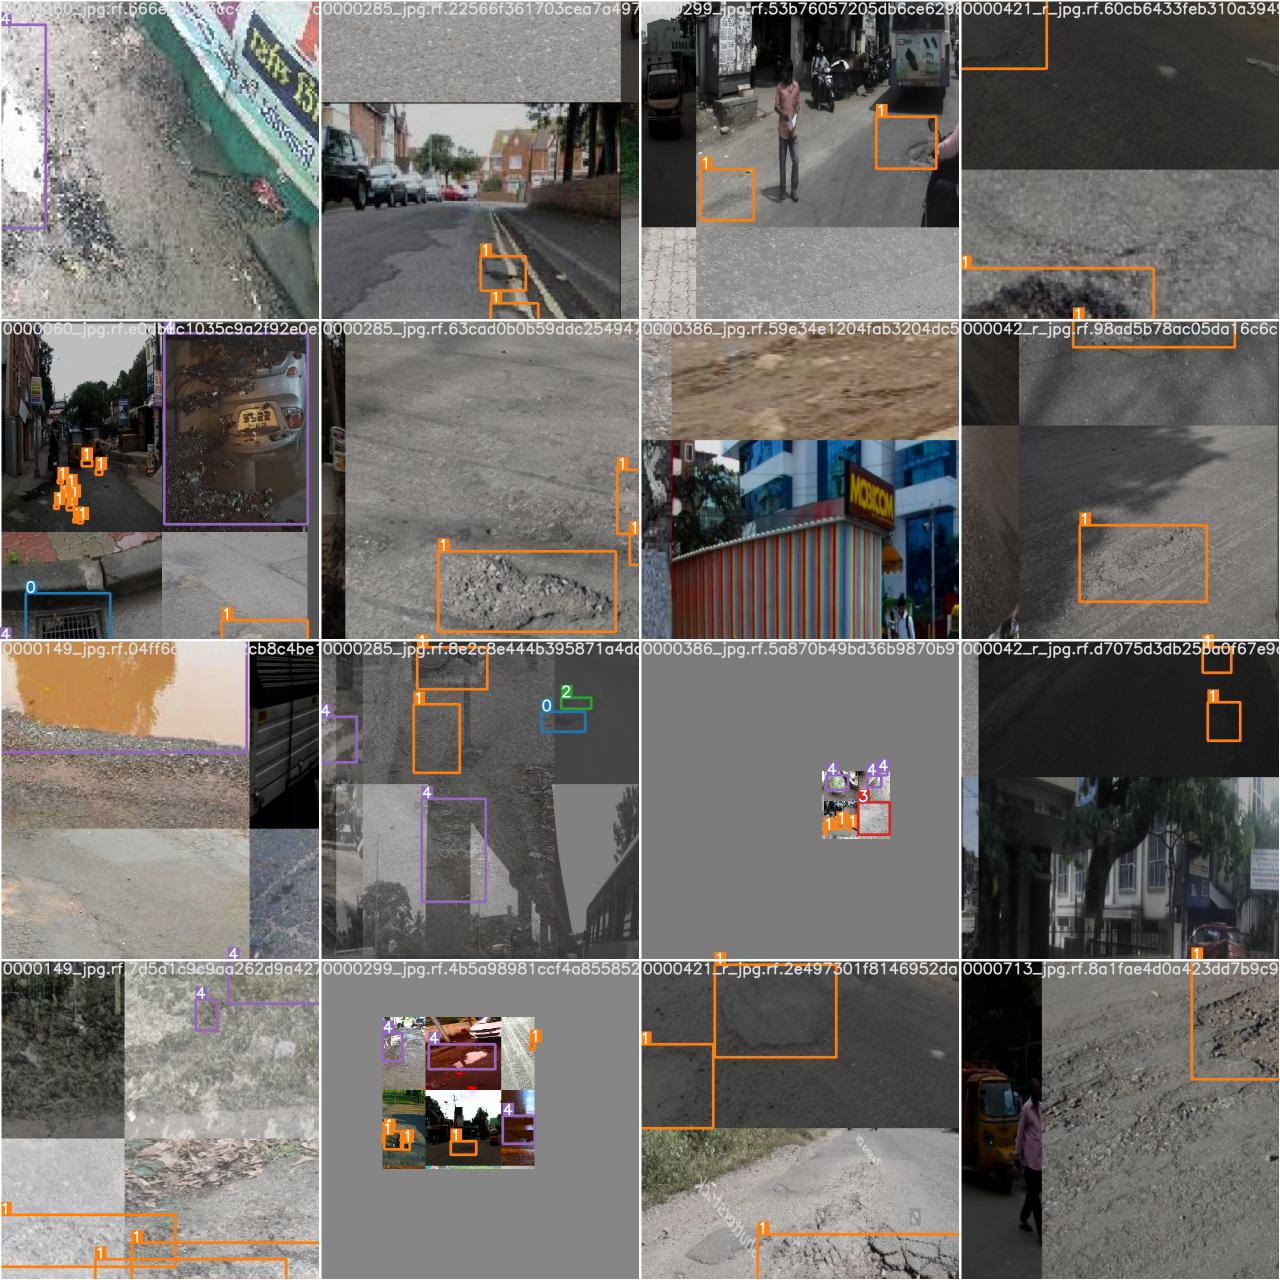

In [28]:
from IPython.display import Image

# Now you can use the Image module
Image(filename=f'runs/train/exp2/train_batch0.jpg', width=600)

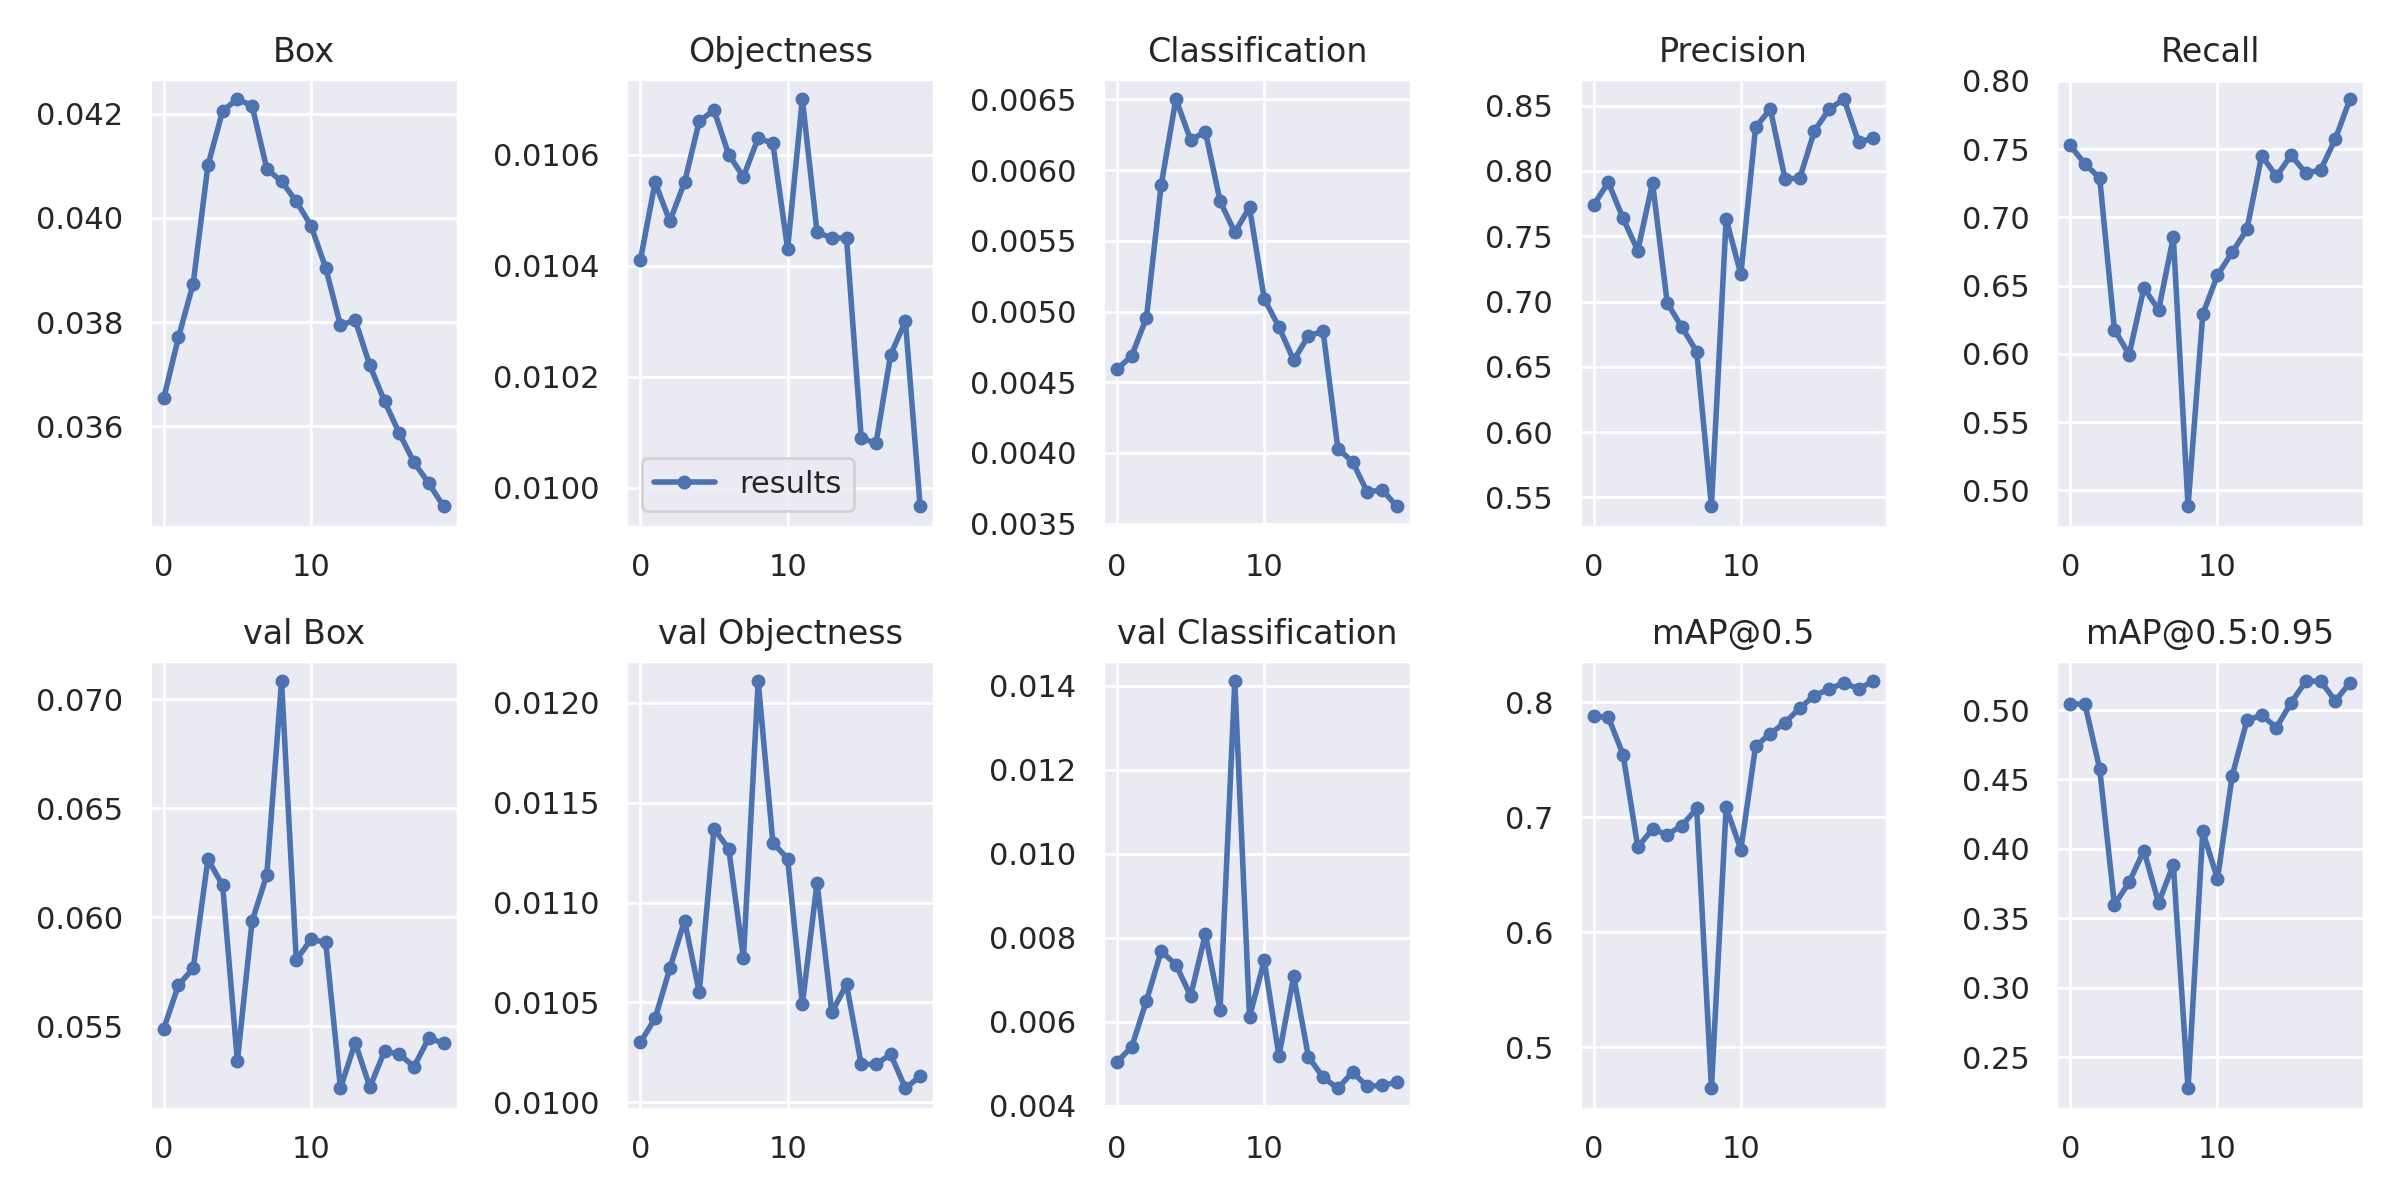

In [29]:
Image(filename=f'runs/train/exp2/results.png', width=600)

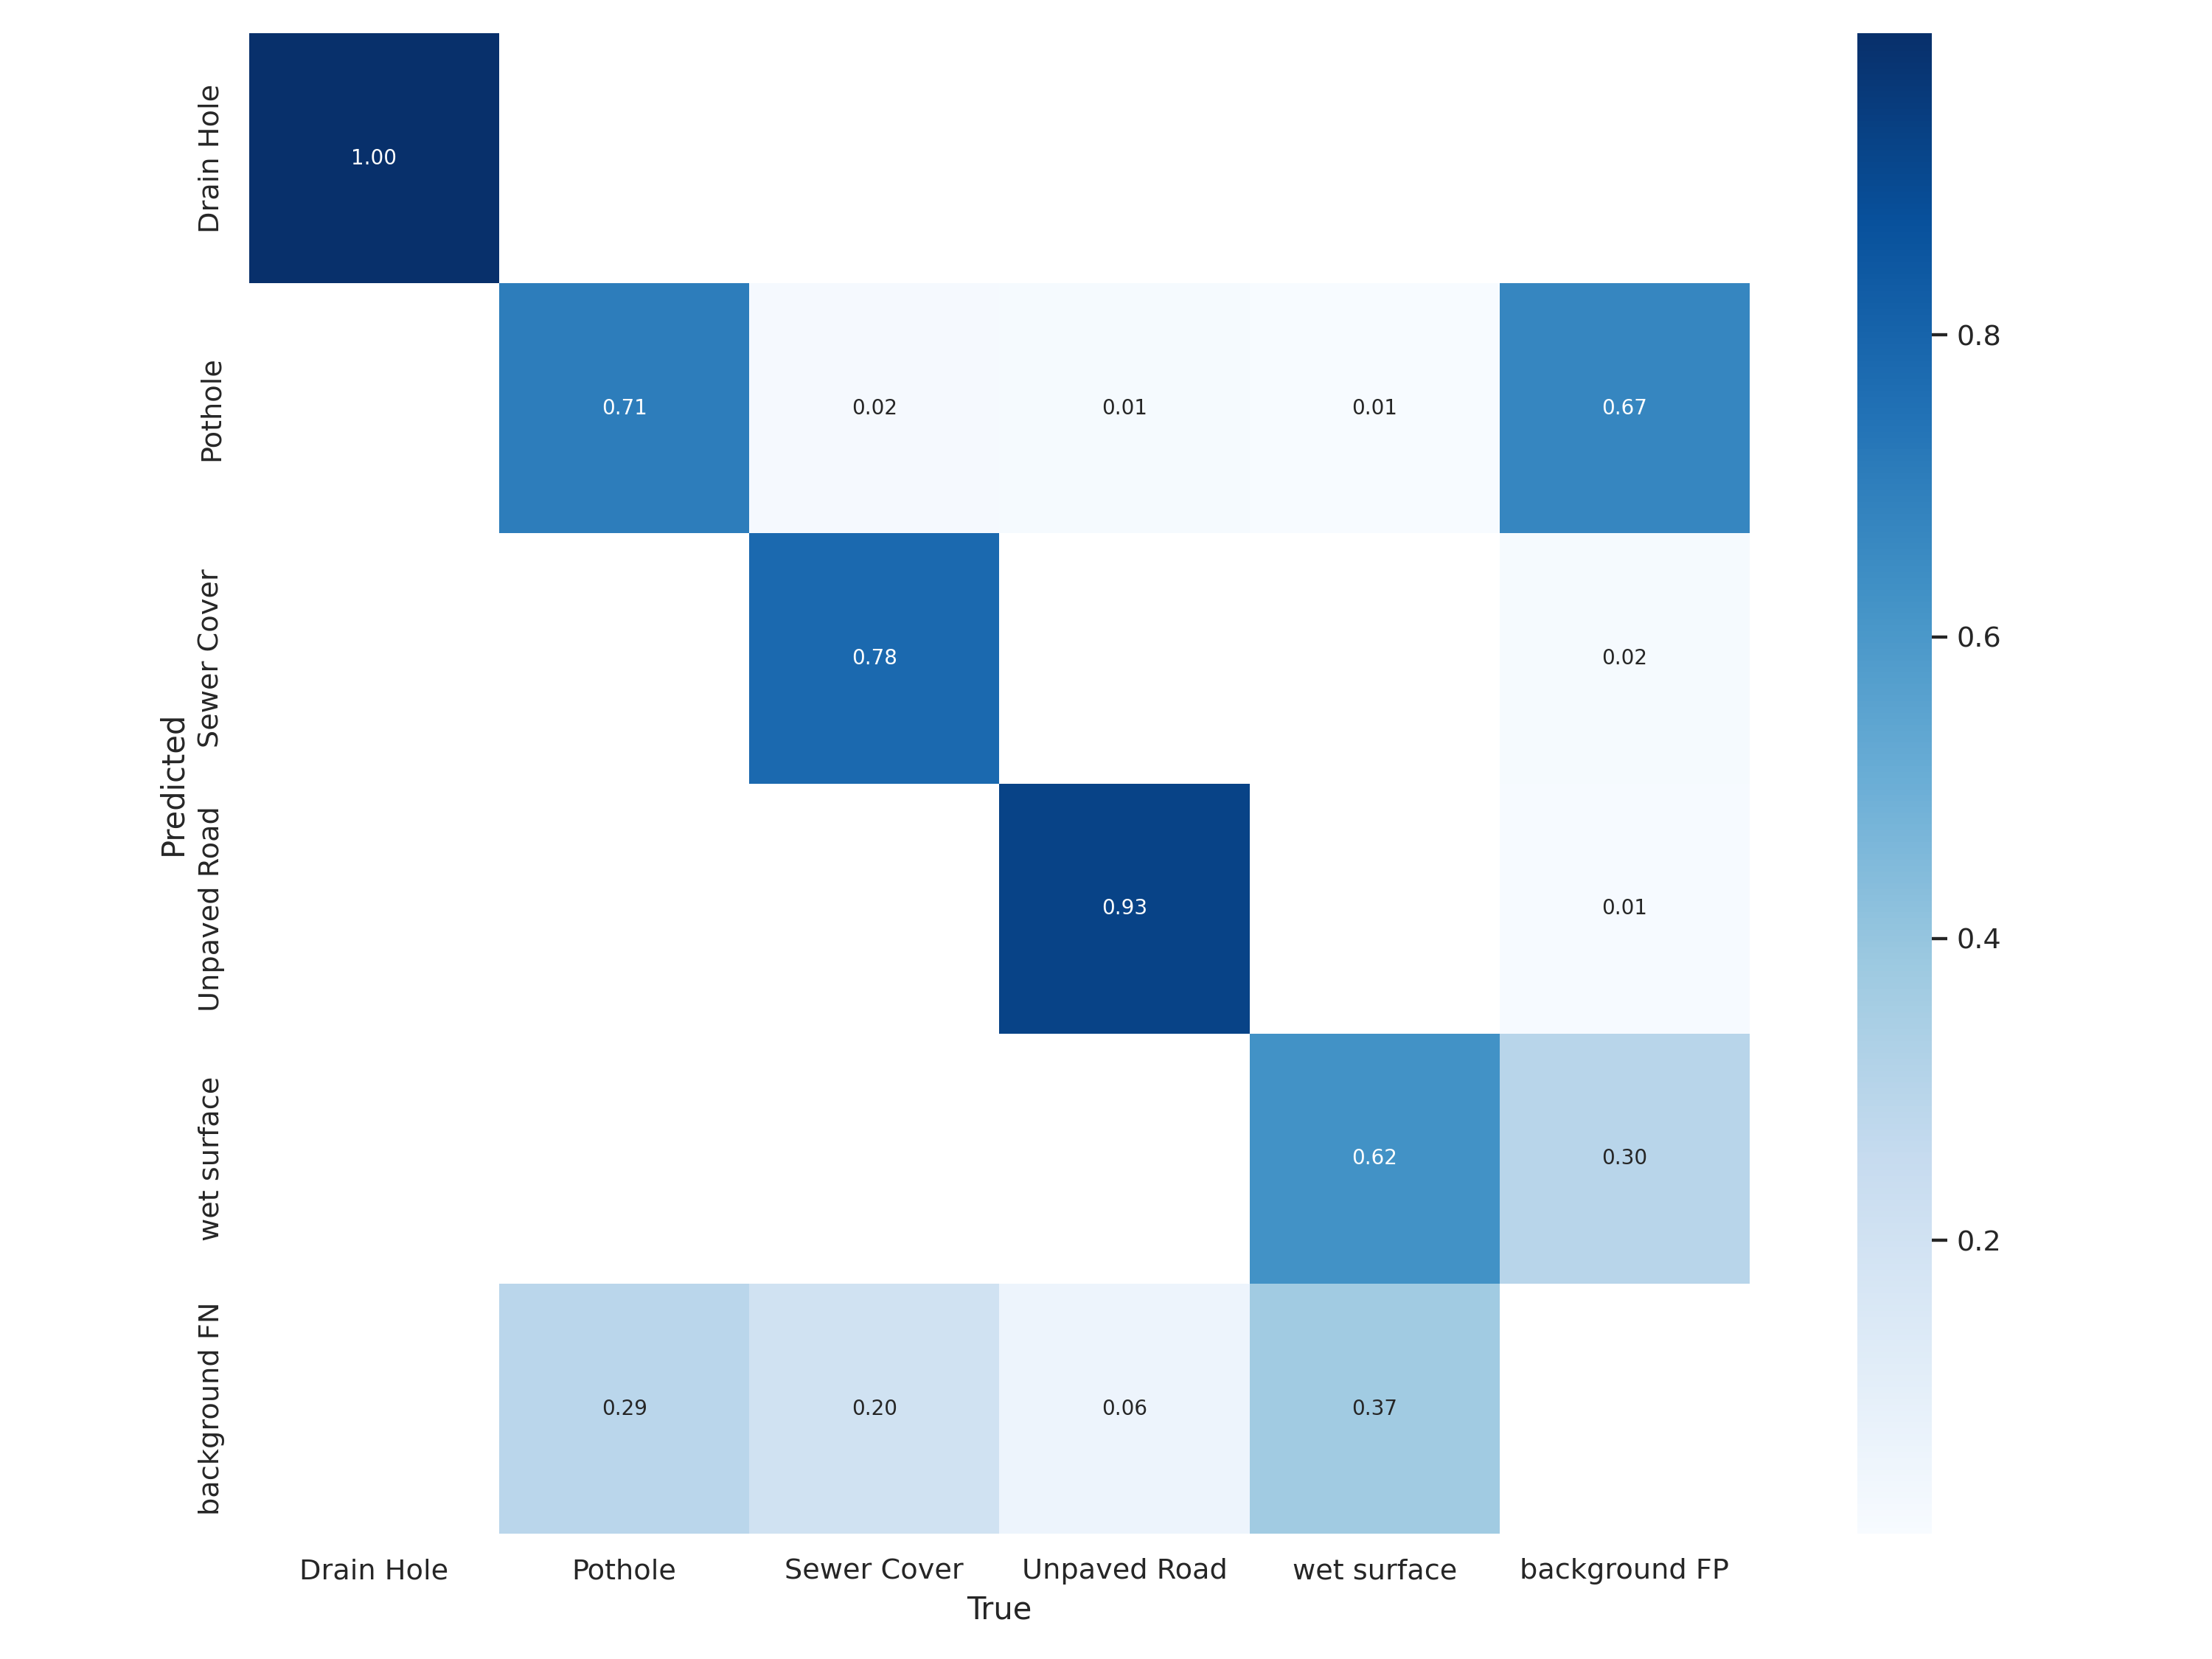

In [30]:
Image(filename=f'runs/train/exp2/confusion_matrix.png', width=600)

In [33]:
!ls runs/test/exp

F1_curve.png  confusion_matrix.png    test_batch1_pred.jpg
PR_curve.png  test_batch0_labels.jpg  test_batch2_labels.jpg
P_curve.png   test_batch0_pred.jpg    test_batch2_pred.jpg
R_curve.png   test_batch1_labels.jpg


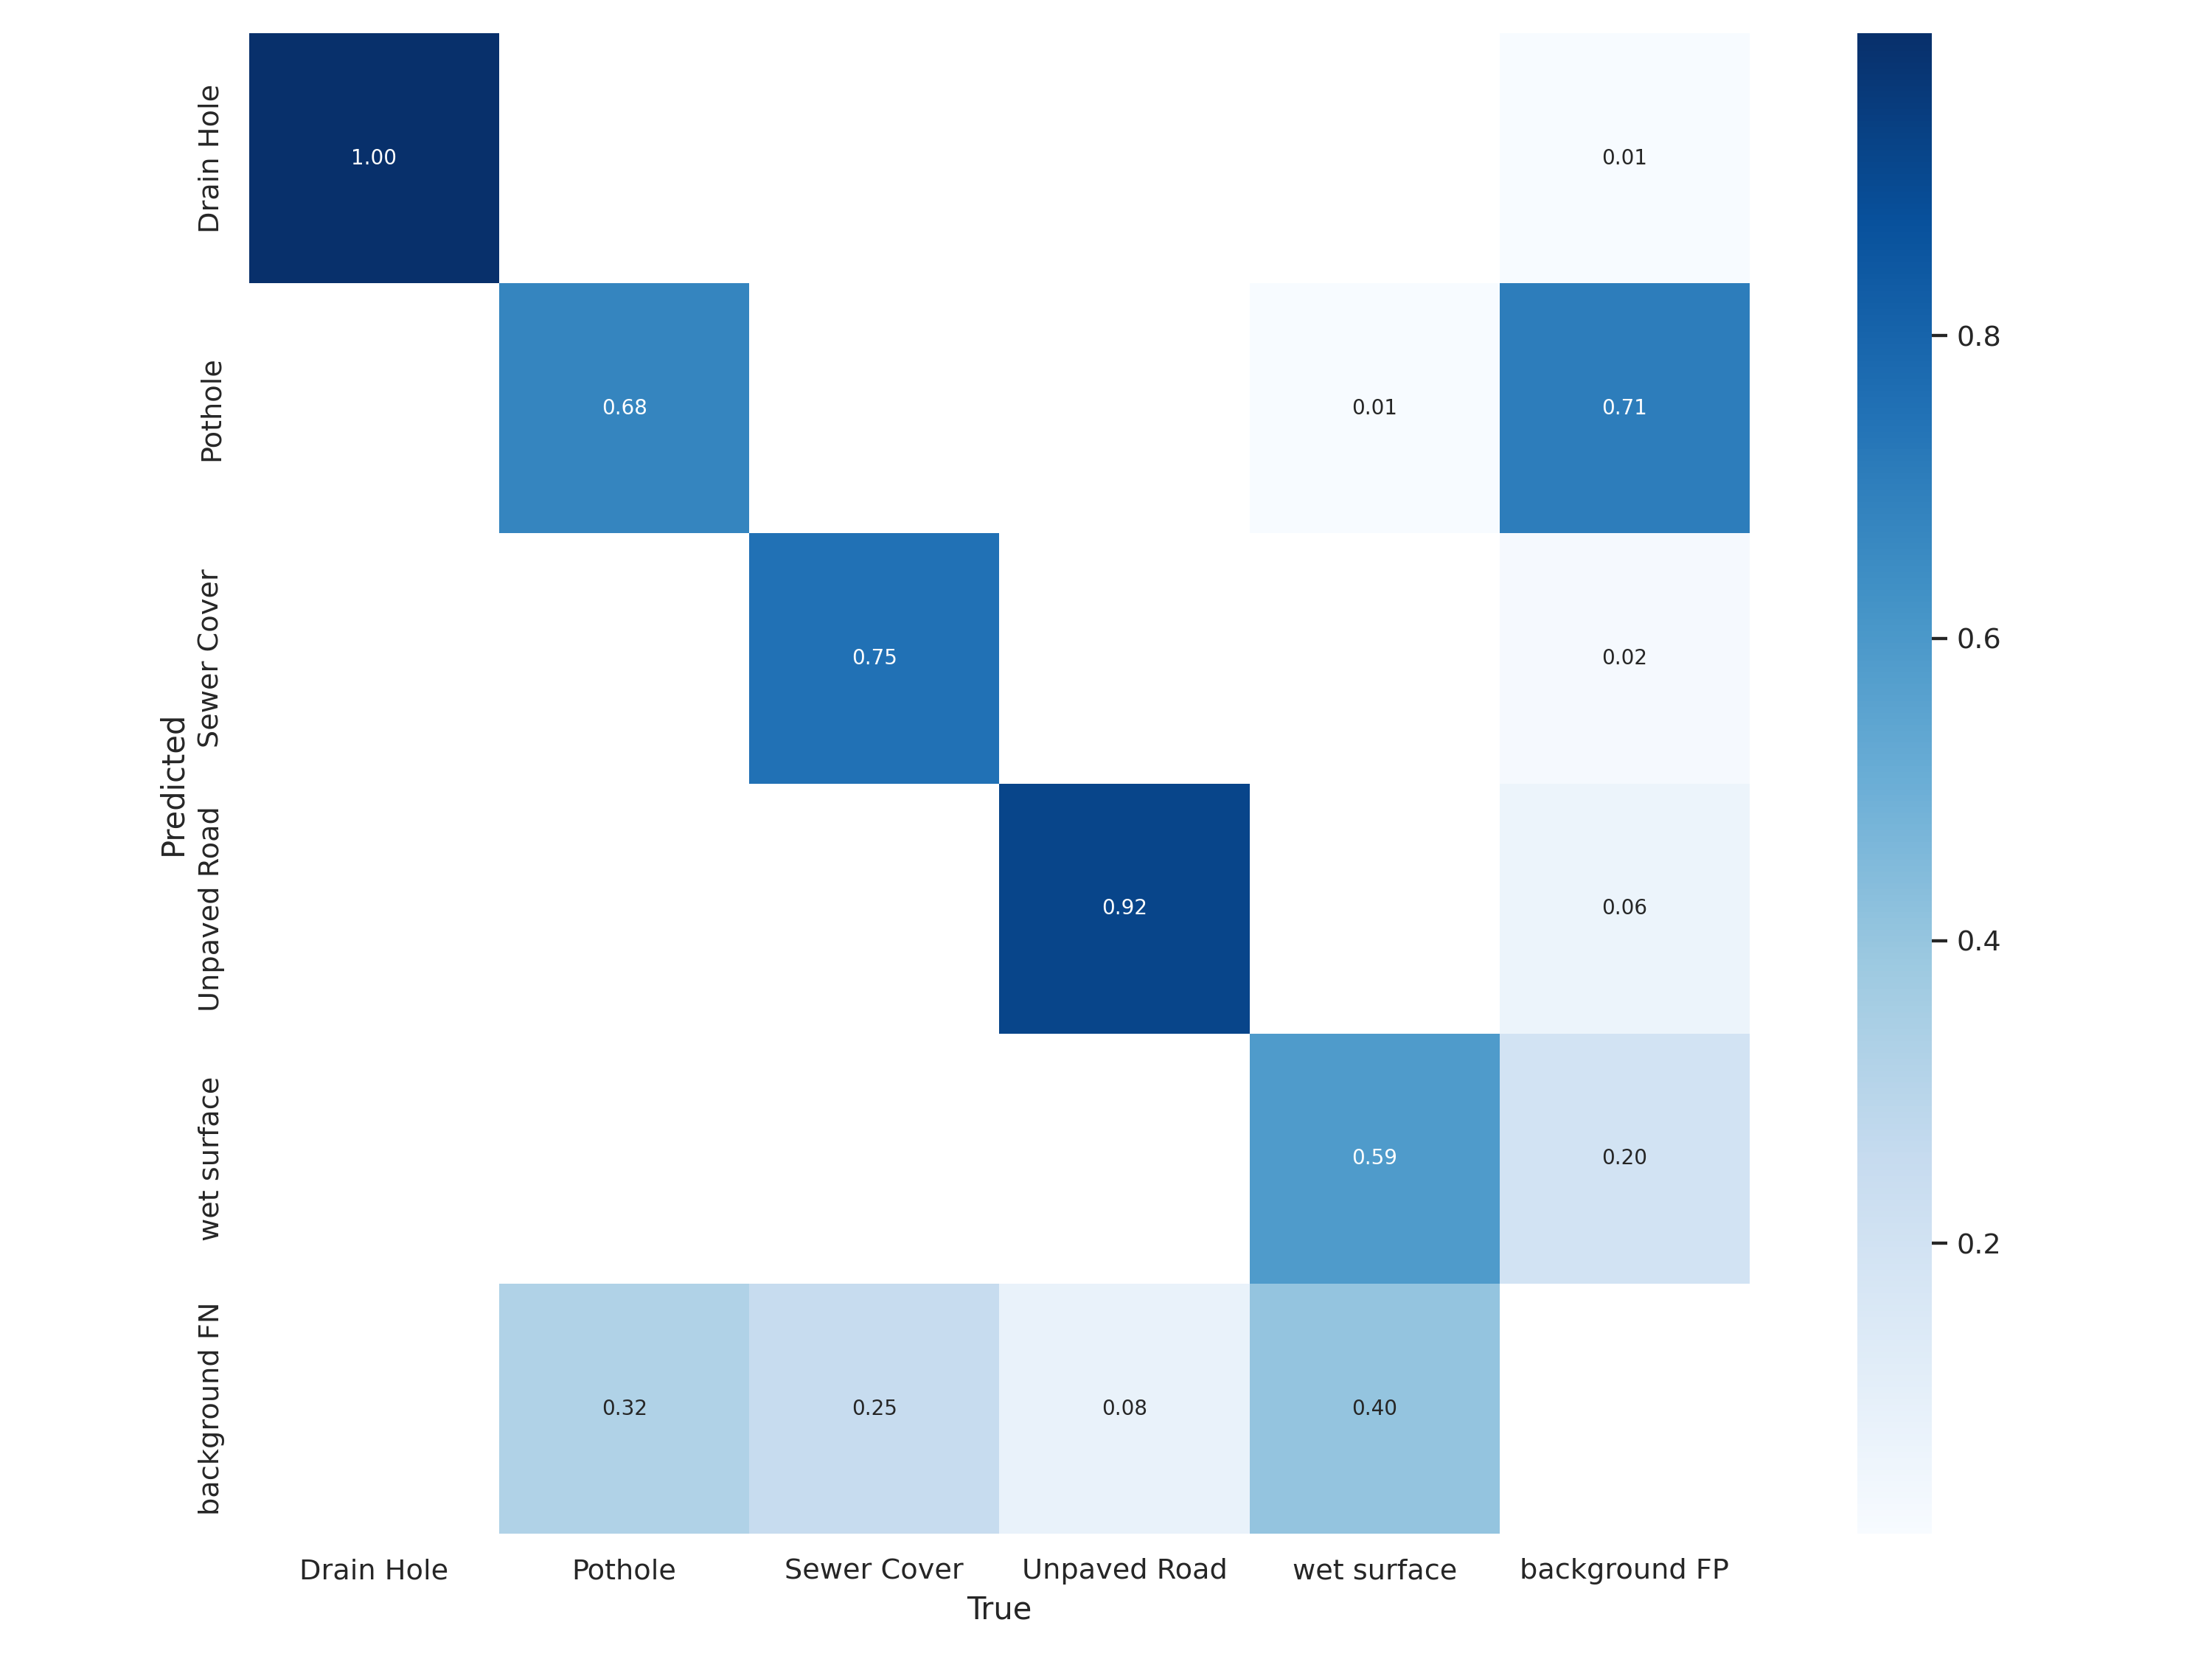

In [34]:
Image(filename=f'runs/test/exp/confusion_matrix.png', width=600)

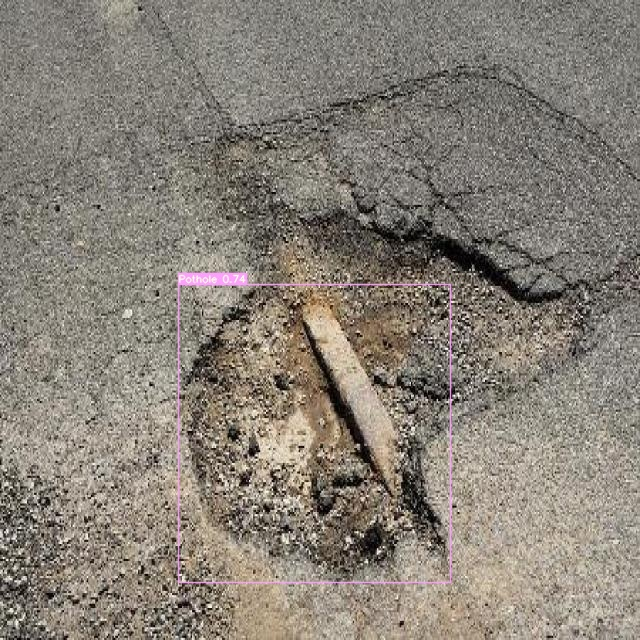

In [35]:
Image(filename=f'runs/detect/exp/img-538_jpg.rf.25cd00a8488cfc65186d3fda1a42a779.jpg', width=600)